<a href="https://colab.research.google.com/github/HardikNickam/colab-eda/blob/main/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('scraped_data.csv')

In [ ]:
df

,url,product_name,price,brand,seller
0,https://www.noon.com//egypt-en/sportq-yoga-mat...,SportQ Yoga Mat Non Slip 6mm Thick Nitrile Rub...,EGP 450.00 Inclusive of VAT,SportQ,SportQ
1,https://www.noon.com//egypt-en/full-round-foam...,Full Round Foam Roller 15.2x45cm,EGP 943.00 Inclusive of VAT,BODY SCULPTURE,noon
2,https://www.noon.com//egypt-en/5-piece-fitness...,5-Piece Fitness Exercise Yoga Stretching Strap...,EGP 110.00 Inclusive of VAT,TOEON,Happy shopping
3,https://www.noon.com//egypt-en/yoga-mat-with-h...,Yoga Mat With Holder Strap And Bag - Blue,EGP 480.00 Inclusive of VAT,SportQ,SportQ
4,https://www.noon.com//egypt-en/sportq-yoga-mat...,SportQ Yoga Mat Non Slip 6mm Thick Nitrile Rub...,EGP 500.00 Inclusive of VAT,SportQ,SportQ
...,...,...,...,...,...
245,https://www.noon.com//egypt-en/eercise-gym-yog...,Eercise Gym Yoga Swiss Ball Fitness Ab Keep F...,EGP 525.00 Inclusive of VAT,Kanteen Store,Kanteen.store
246,https://www.noon.com//egypt-en/exercise-rollin...,Exercise Rolling Wheel With Yoga Mat,EGP 250.00 Inclusive of VAT,Kanteen Store,Kanteen.store
247,https://www.noon.com//egypt-en/yoga-ball-with-...,Yoga Ball With Air Pump - 65 cm 65cm,EGP 690.00 Inclusive of VAT,Emfil,ibrahim abdelrazek abdalla
248,https://www.noon.com//egypt-en/blue-10mm-natur...,Blue 10mm Natural rubber Anti slip antibacteri...,EGP 1638.00 Inclusive of VAT,OR,ibrahim abdelrazek abdalla


In [ ]:
df['price']

,price
0,EGP 450.00 Inclusive of VAT
1,EGP 943.00 Inclusive of VAT
2,EGP 110.00 Inclusive of VAT
3,EGP 480.00 Inclusive of VAT
4,EGP 500.00 Inclusive of VAT
...,...
245,EGP 525.00 Inclusive of VAT
246,EGP 250.00 Inclusive of VAT
247,EGP 690.00 Inclusive of VAT
248,EGP 1638.00 Inclusive of VAT


In [ ]:
df['price'] = df['price'].str.extract(r'(\d+\.?\d*)').astype(float)
df['price']

,price
0,450.0
1,943.0
2,110.0
3,480.0
4,500.0
...,...
245,525.0
246,250.0
247,690.0
248,1638.0


In [ ]:
df = df.drop('url', axis=1)

In [ ]:
most_expensive = df.loc[df['price'].idxmax()]
cheapest = df.loc[df['price'].idxmin()]

## Most Expensive

In [ ]:
most_expensive

,121
product_name,Sand Boxing Bag 120cm
price,2317.35
brand,Fitness World
seller,Brand House


## Cheapest

In [ ]:
cheapest

,25
product_name,Set of 5 Levels Resistance Bands Yoga Belt Ela...
price,87.4
brand,Generic
seller,3arba.com


## Most Expensive vs Cheapest Product

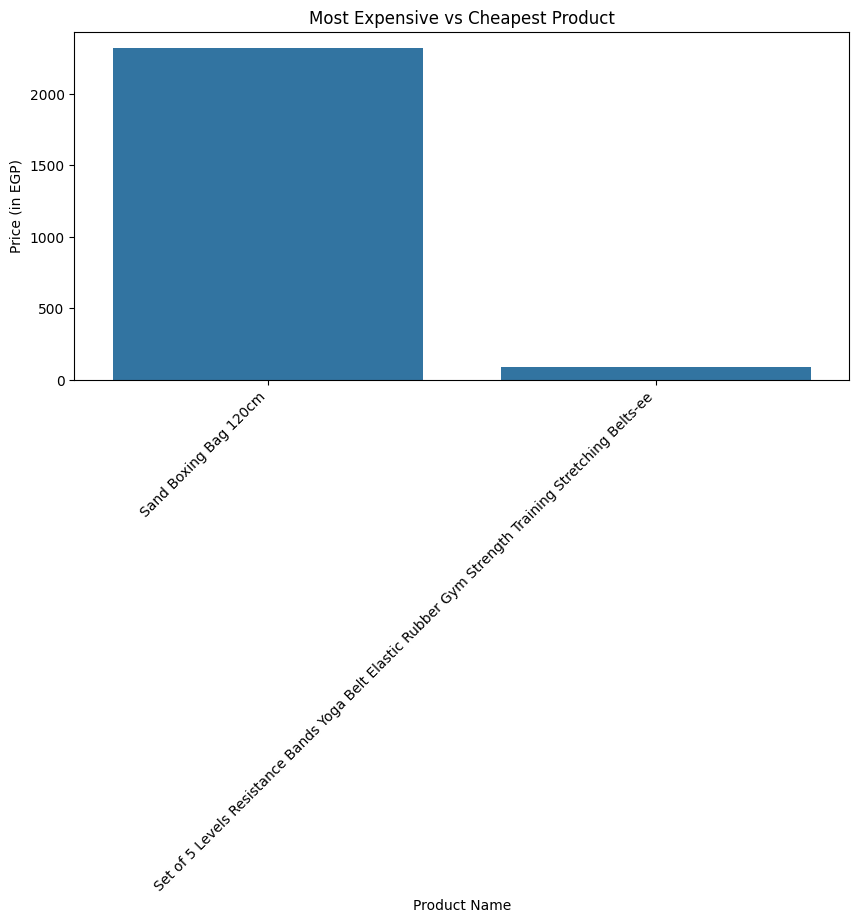

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=[most_expensive['product_name'], cheapest['product_name']],
            y=[most_expensive['price'], cheapest['price']])
plt.title('Most Expensive vs Cheapest Product')
plt.xlabel('Product Name')
plt.ylabel('Price (in EGP)')
plt.xticks(rotation=45, ha="right")
plt.subplots_adjust(bottom=0.3)
plt.show()

## Number of Products from Each Brand

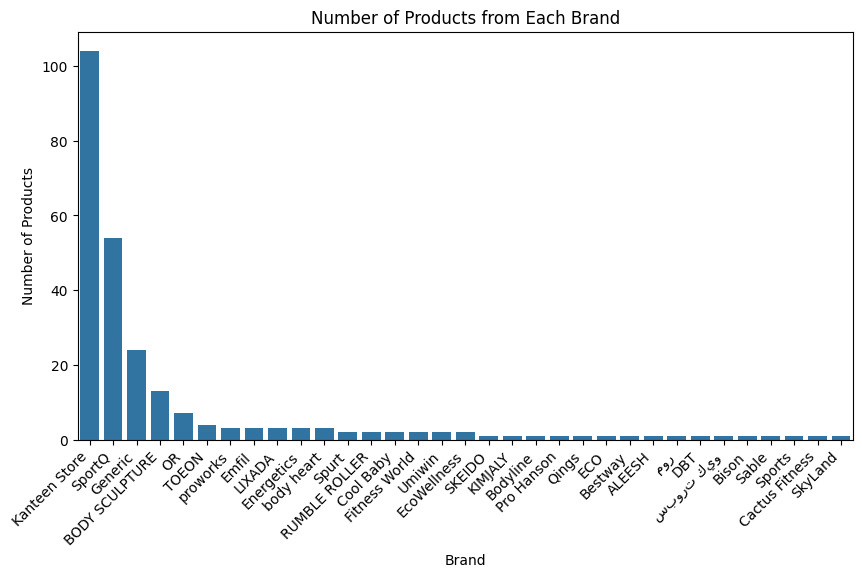

In [ ]:
plt.figure(figsize=(10, 6))
brand_counts = df['brand'].value_counts()
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title('Number of Products from Each Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha="right")
plt.subplots_adjust(bottom=0.2)
plt.show()

## Number of Products by Each Seller

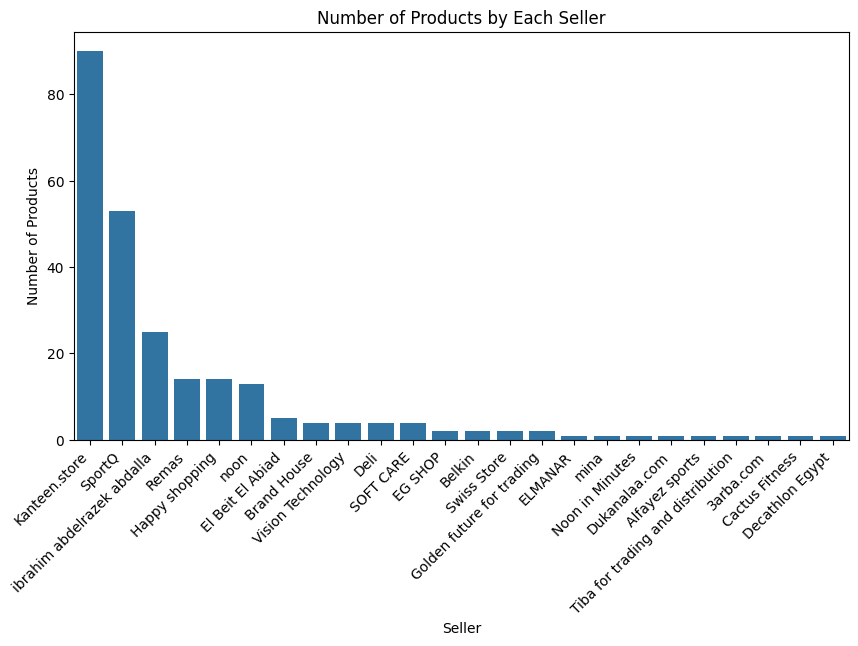

In [ ]:
plt.figure(figsize=(10, 6))
seller_counts = df['seller'].value_counts()
sns.barplot(x=seller_counts.index, y=seller_counts.values)
plt.title('Number of Products by Each Seller')
plt.xlabel('Seller')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha="right")
plt.subplots_adjust(bottom=0.2)
plt.show()

## Average Price of Products by Seller

In [ ]:
seller_avg_price = df.groupby('seller')['price'].mean().reset_index()


In [ ]:
seller_avg_price

,seller,price
0,3arba.com,87.400000
1,Alfayez sports,190.000000
2,Belkin,448.500000
3,Brand House,1129.962500
4,Cactus Fitness,585.000000
5,Decathlon Egypt,299.000000
6,Deli,266.987500
7,Dukanalaa.com,1200.000000
8,EG SHOP,999.000000
9,ELMANAR,266.000000


<ipython-input-70-883c54c42cf1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller', y='price', data=seller_avg_price, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping 

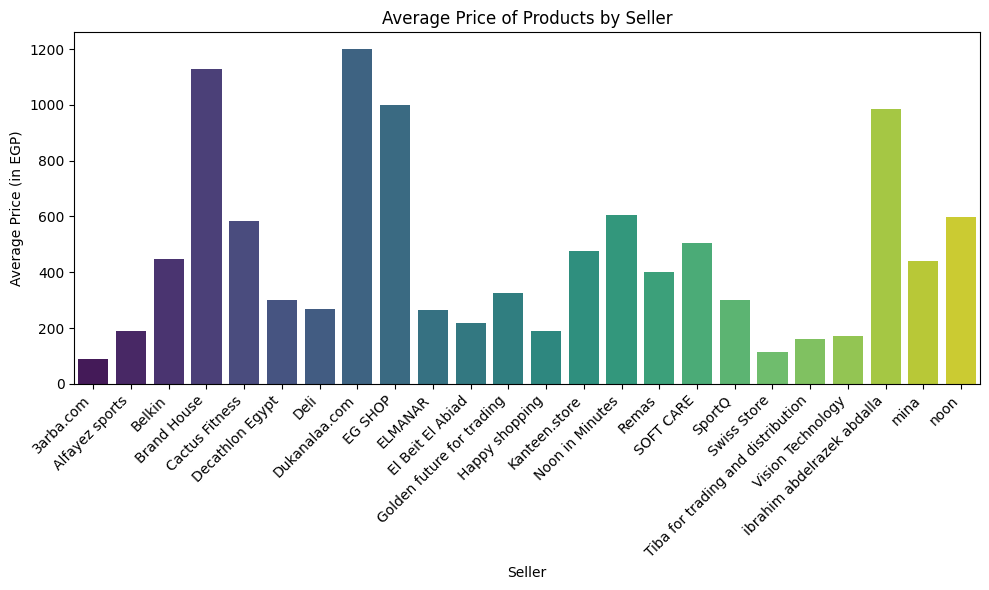

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='seller', y='price', data=seller_avg_price, palette='viridis')

plt.title('Average Price of Products by Seller')
plt.xlabel('Seller')
plt.ylabel('Average Price (in EGP)')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Price Distribution of Products

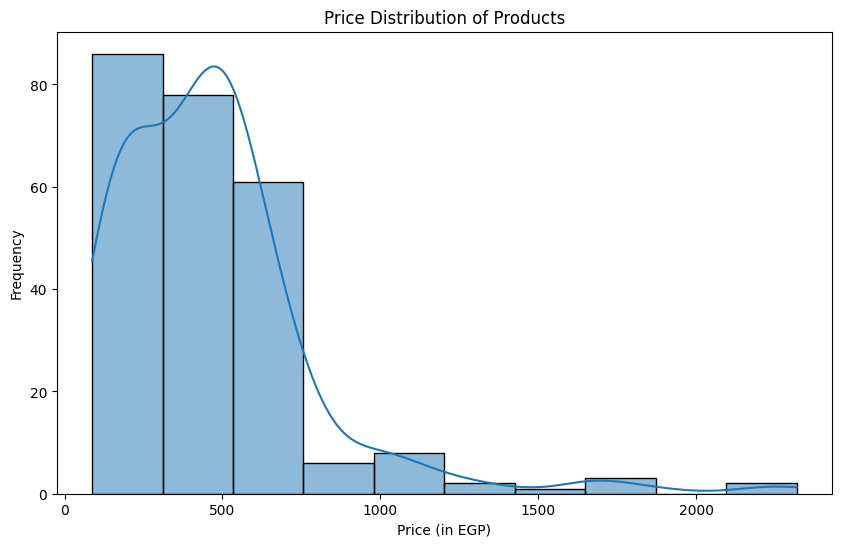

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=10, kde=True)
plt.title('Price Distribution of Products')
plt.xlabel('Price (in EGP)')
plt.ylabel('Frequency')
plt.show()


## Average Price of Products by Brand

<ipython-input-72-41690b8aa129>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='brand', y='price', data=brand_avg_price, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping w

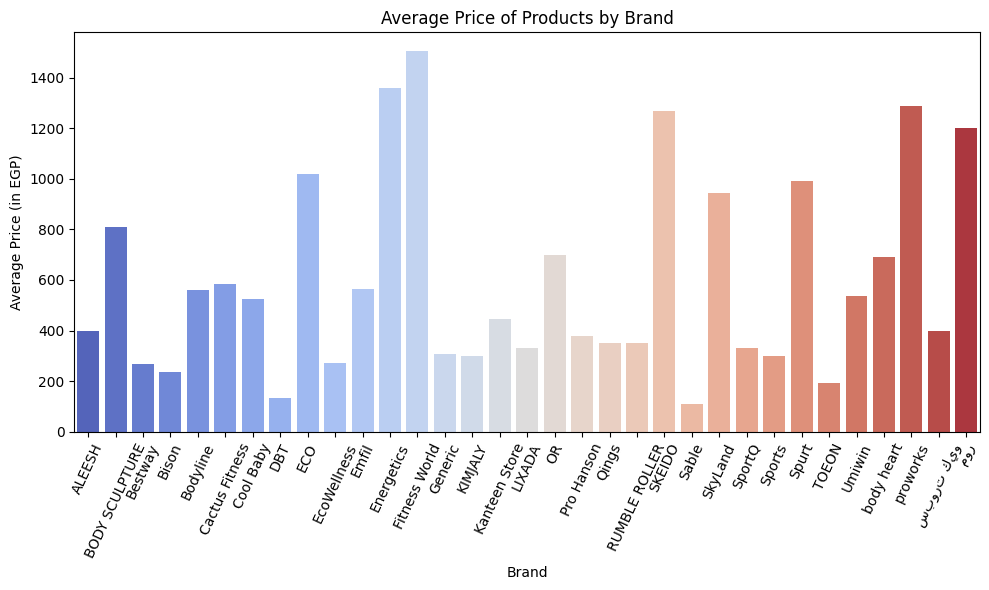

In [ ]:
brand_avg_price = df.groupby('brand')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y='price', data=brand_avg_price, palette='coolwarm')
plt.title('Average Price of Products by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price (in EGP)')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

## Product Distribution by Seller

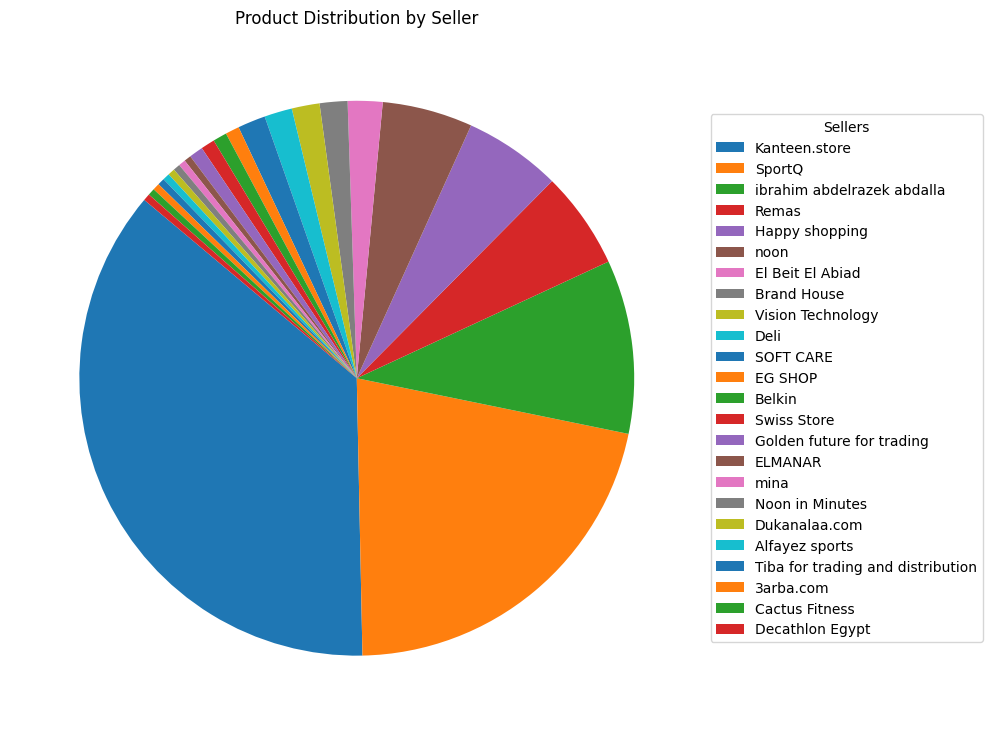

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(seller_counts, startangle=140)
plt.title('Product Distribution by Seller')

plt.legend(seller_counts.index, title='Sellers', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()